## Final Project Submission

Please fill out:
* Student name: Erick Kibugi, Hilda Jerotich, David Muriithi, Alice Muia, Emmanuel Kipleting, Boniface Njeri, Bernice Nyawira  
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: George Kamundia
* Blog post URL:


## Introduction
Golden Arc Pictures is preparing to launch a new movie studio with the goal of producing original video content. However, the company currently lacks experience in film production. This analysis will explore various datasets related to the movie industry to uncover trends, patterns, and audience preferences. The insights gained will be translated into actionable recommendations that the head of Golden Arc Pictures’s new studio can use to make informed decisions about the types of films to develop.

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import gzip
import sqlite3
import seaborn as sns


## Data loading, extraction and analysis

For the first dataset, we are dealing with tmdd.movies.csv.gz 

In [2]:
df_tmdb_mov = pd.read_csv('tmdb.movies.csv')
df_tmdb_mov.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [3]:
# with the following lines of code, we aim to investigate the dataset and understand its structure, size, and data types.
df_tmdb_mov.info()
df_tmdb_mov.shape
df_tmdb_mov.duplicated().sum()
df_tmdb_mov.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

As a result, we have observed there are no duplicates, no null values and date format is YYYY-MM-DD.

In [6]:
# We will now check the number of movies available in each language.
count_by_language = df_tmdb_mov['original_language'].value_counts()
print(count_by_language)

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
cr        1
ps        1
nb        1
bo        1
si        1
Name: original_language, Length: 76, dtype: int64


## Data visualization

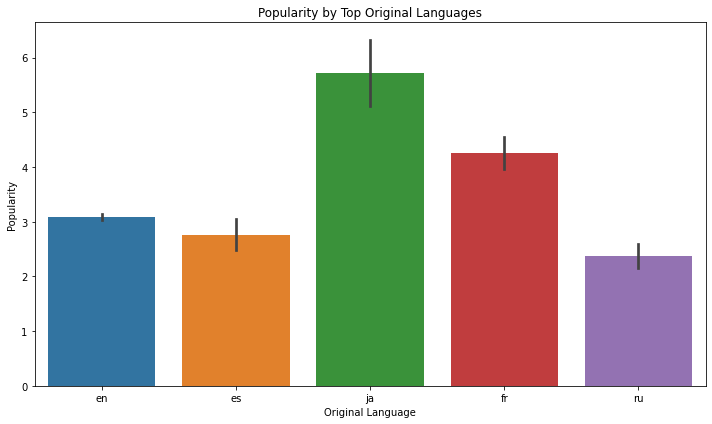

In [11]:
# the following is a simple bar plot to visualize the count of movies by original language
import matplotlib.pyplot as plt
top_languages = df_tmdb_mov['original_language'].value_counts().nlargest(5).index
filtered_df = df_tmdb_mov[df_tmdb_mov['original_language'].isin(top_languages)]

plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_df, x='original_language', y='popularity')
plt.title('Popularity by Top Original Languages')
plt.xlabel('Original Language')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

Inference: Japanese is obsereved to have a higher popularity despite having less movie counts compares to a language like English that is the most common.  

### Checking for normality


Language: en


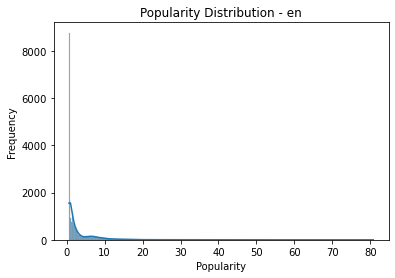


Language: fr


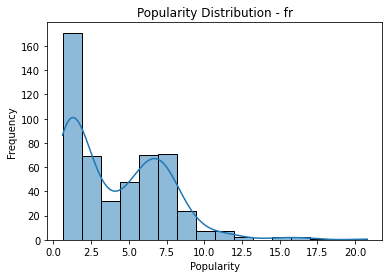


Language: es


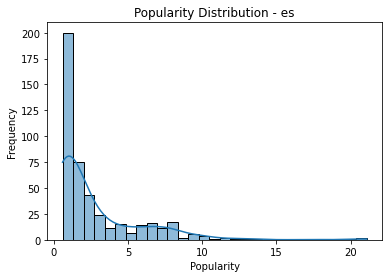


Language: ru


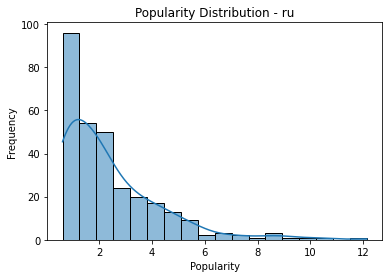


Language: ja


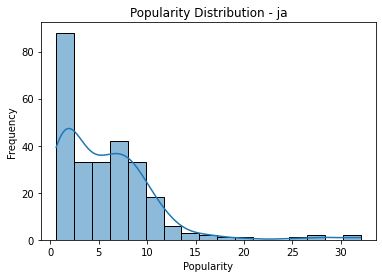

In [12]:
top_languages = df_tmdb_mov['original_language'].value_counts().nlargest(5).index

for lang in top_languages:
    lang_data = df_tmdb_mov[df_tmdb_mov['original_language'] == lang]['popularity']
    
    print(f'\nLanguage: {lang}')

    # Histogram
    sns.histplot(lang_data, kde=True)
    plt.title(f'Popularity Distribution - {lang}')
    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.show()

###  Hypothesis testing

In [13]:
# Group popularity by language
groups = [filtered_df[filtered_df['original_language'] == lang]['popularity'] for lang in top_languages]

from scipy.stats import f_oneway
# Perform one-way ANOVA
f_stat, p_val = f_oneway(*groups)

print(f"ANOVA test: F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")

ANOVA test: F-statistic = 34.246, p-value = 0.0000


There is a significant difference in average popularity among languages since p<0.05